In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import datetime as dt
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/FINALS DATASETS/sales_data.csv')
df.head()

,Food Item,Location,Date,Price,Quantity Sold,Type,Sales
0,Soft Drink,Los Angeles,2023-07-24,9.07,110,Beverage,997.70
1,Ice Cream,Chicago,2023-10-19,9.91,101,Dessert,1000.91
2,Cheeseburger,Phoenix,2023-08-03,2.95,339,Fast Food,1000.05
3,Salad,Chicago,2023-07-09,6.97,143,Healthy,996.71
4,Salad,New York,2023-07-17,3.37,297,Healthy,1000.89


In [ ]:
# here, df.info() is used to gather more information about the dataset such as the count, the datatypes, and the like.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Food Item      100 non-null    object 
 1   Location       100 non-null    object 
 2   Date           100 non-null    object 
 3   Price          100 non-null    float64
 4   Quantity Sold  100 non-null    int64  
 5   Type           100 non-null    object 
 6   Sales          100 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [ ]:
# to check for any null values and if data cleaning is necessary
df.isnull().sum()

Food Item        0
Location         0
Date             0
Price            0
Quantity Sold    0
Type             0
Sales            0
dtype: int64

      Food Item  Price  Quantity Sold   Sales  Optimal Price
0    Soft Drink   2.52             19   47.88         40.864
1     Ice Cream   8.74             31  270.94        262.762
2  Cheeseburger   1.53             17   26.01         27.130
3         Salad   5.24             32  167.68        155.752
4         Salad   2.04             43   87.72         91.504


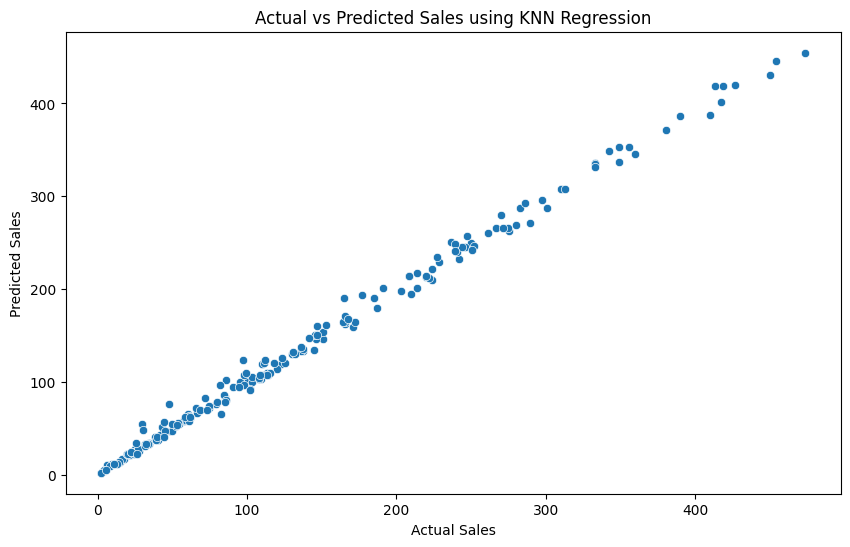

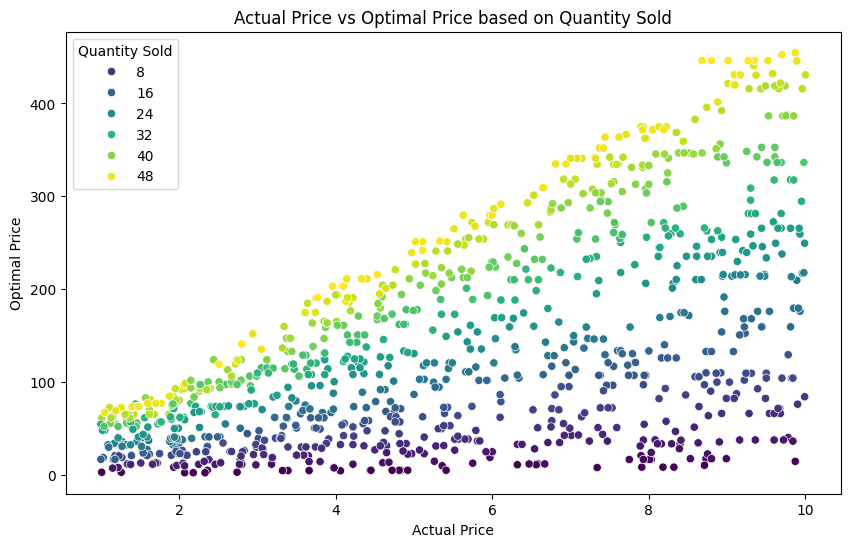

In [ ]:
# Define the number of rows for your dataset
num_rows = 1000

# Seed for reproducibility
np.random.seed(0)

# Generate food item names and corresponding types
food_items = ['Cheeseburger', 'French Fries', 'Pizza Slice', 'Salad', 'Soft Drink', 'Ice Cream']
food_types = ['Fast Food', 'Fast Food', 'Fast Food', 'Healthy', 'Beverage', 'Dessert']
food_type_dict = dict(zip(food_items, food_types))

# Generate random data for food sales
food_data = {
    'Food Item': np.random.choice(food_items, size=num_rows),
    'Price': np.round(np.random.uniform(1.0, 10.0, size=num_rows), 2),
    'Quantity Sold': np.random.randint(1, 50, size=num_rows)
}

# Calculate sales
food_data['Sales'] = food_data['Price'] * food_data['Quantity Sold']

# Create a DataFrame
df = pd.DataFrame(food_data)

# Prepare the data for KNN regression
X = df[['Price', 'Quantity Sold']]  # Features
y = df['Sales']  # Target

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict sales on the test set
y_pred = knn.predict(X_test)

# Calculate the optimal prices by predicting sales
optimal_prices = knn.predict(X)

# Add the predicted optimal prices to the DataFrame
df['Optimal Price'] = optimal_prices

# Print the first few rows of the dataset with optimal prices
print(df.head())

# Plot the actual vs predicted sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales using KNN Regression')
plt.show()

# Plot the relationship between Price, Quantity Sold, and Optimal Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Optimal Price', hue='Quantity Sold', data=df, palette='viridis')
plt.xlabel('Actual Price')
plt.ylabel('Optimal Price')
plt.title('Actual Price vs Optimal Price based on Quantity Sold')
plt.legend(title='Quantity Sold')
plt.show()